In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
# Creating Dendrogram
import scipy.cluster.hierarchy as sch
linkage_matrix = sch.linkage(X, method = 'complete')

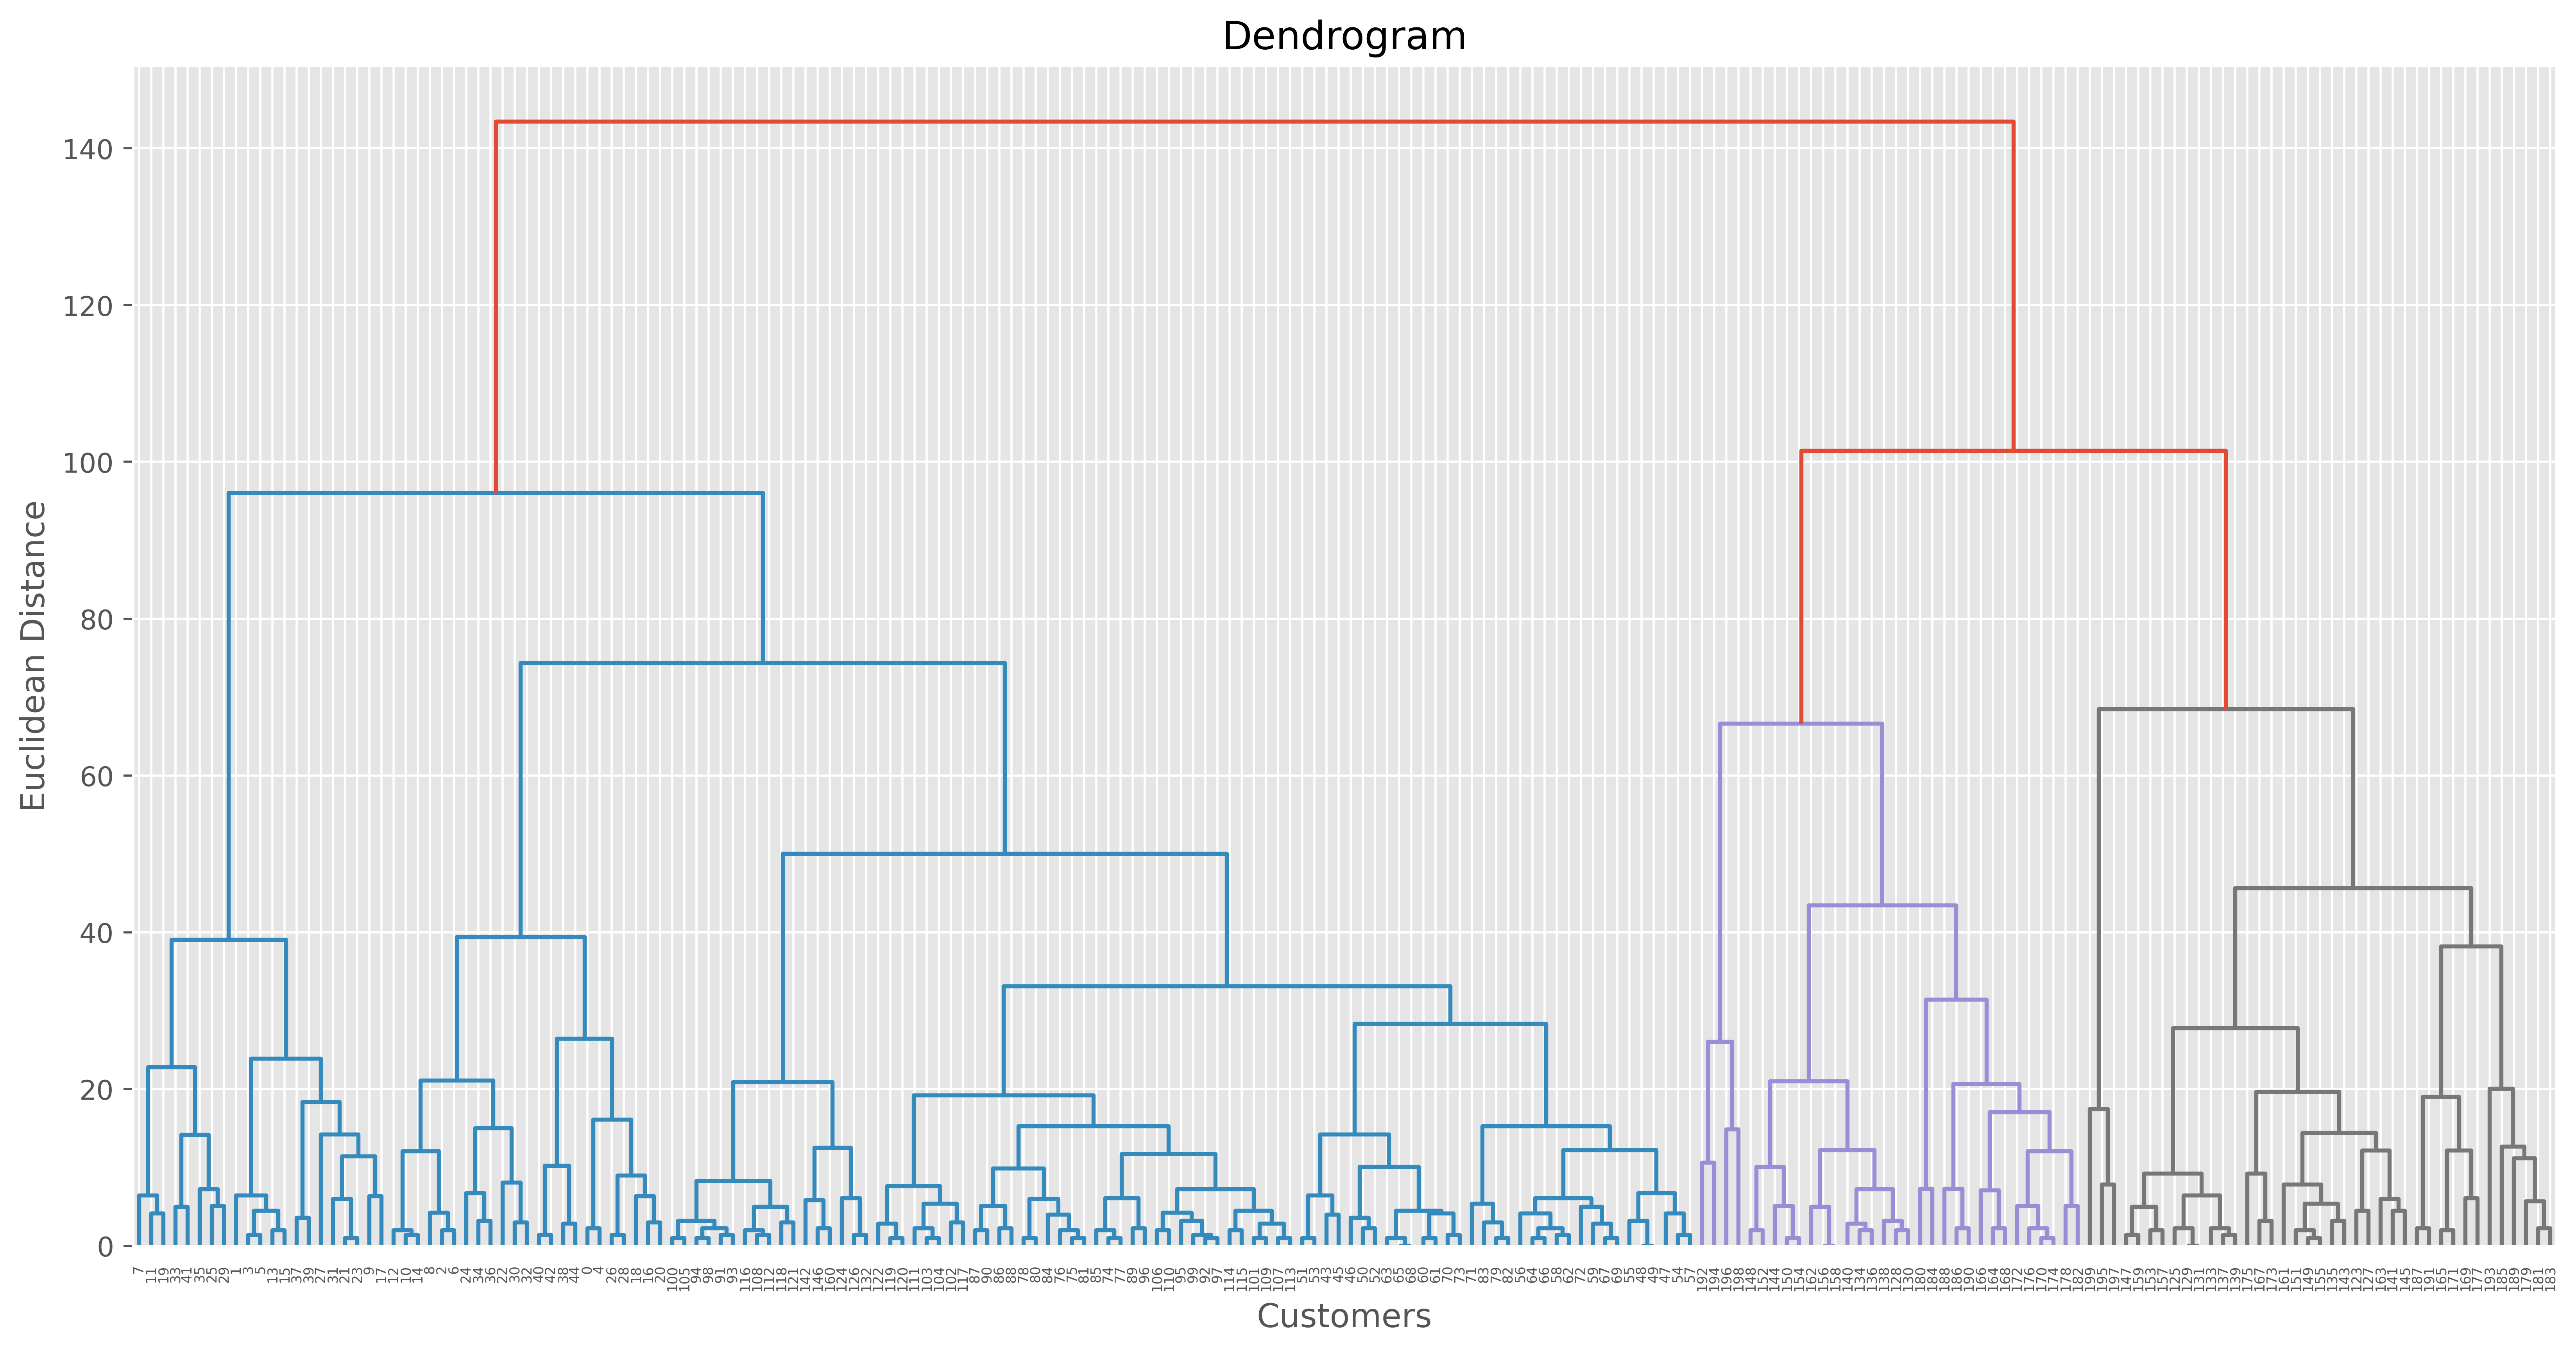

In [10]:
plt.figure(figsize = (16,8), dpi = 500)
dendrogm = sch.dendrogram(linkage_matrix)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.savefig('Dendrogram.png', dpi = 2000)

# ----------------------------------------------------------------------------------------------------

## Complete Linkage

Text(0, 0.5, 'Euclidean Distance')

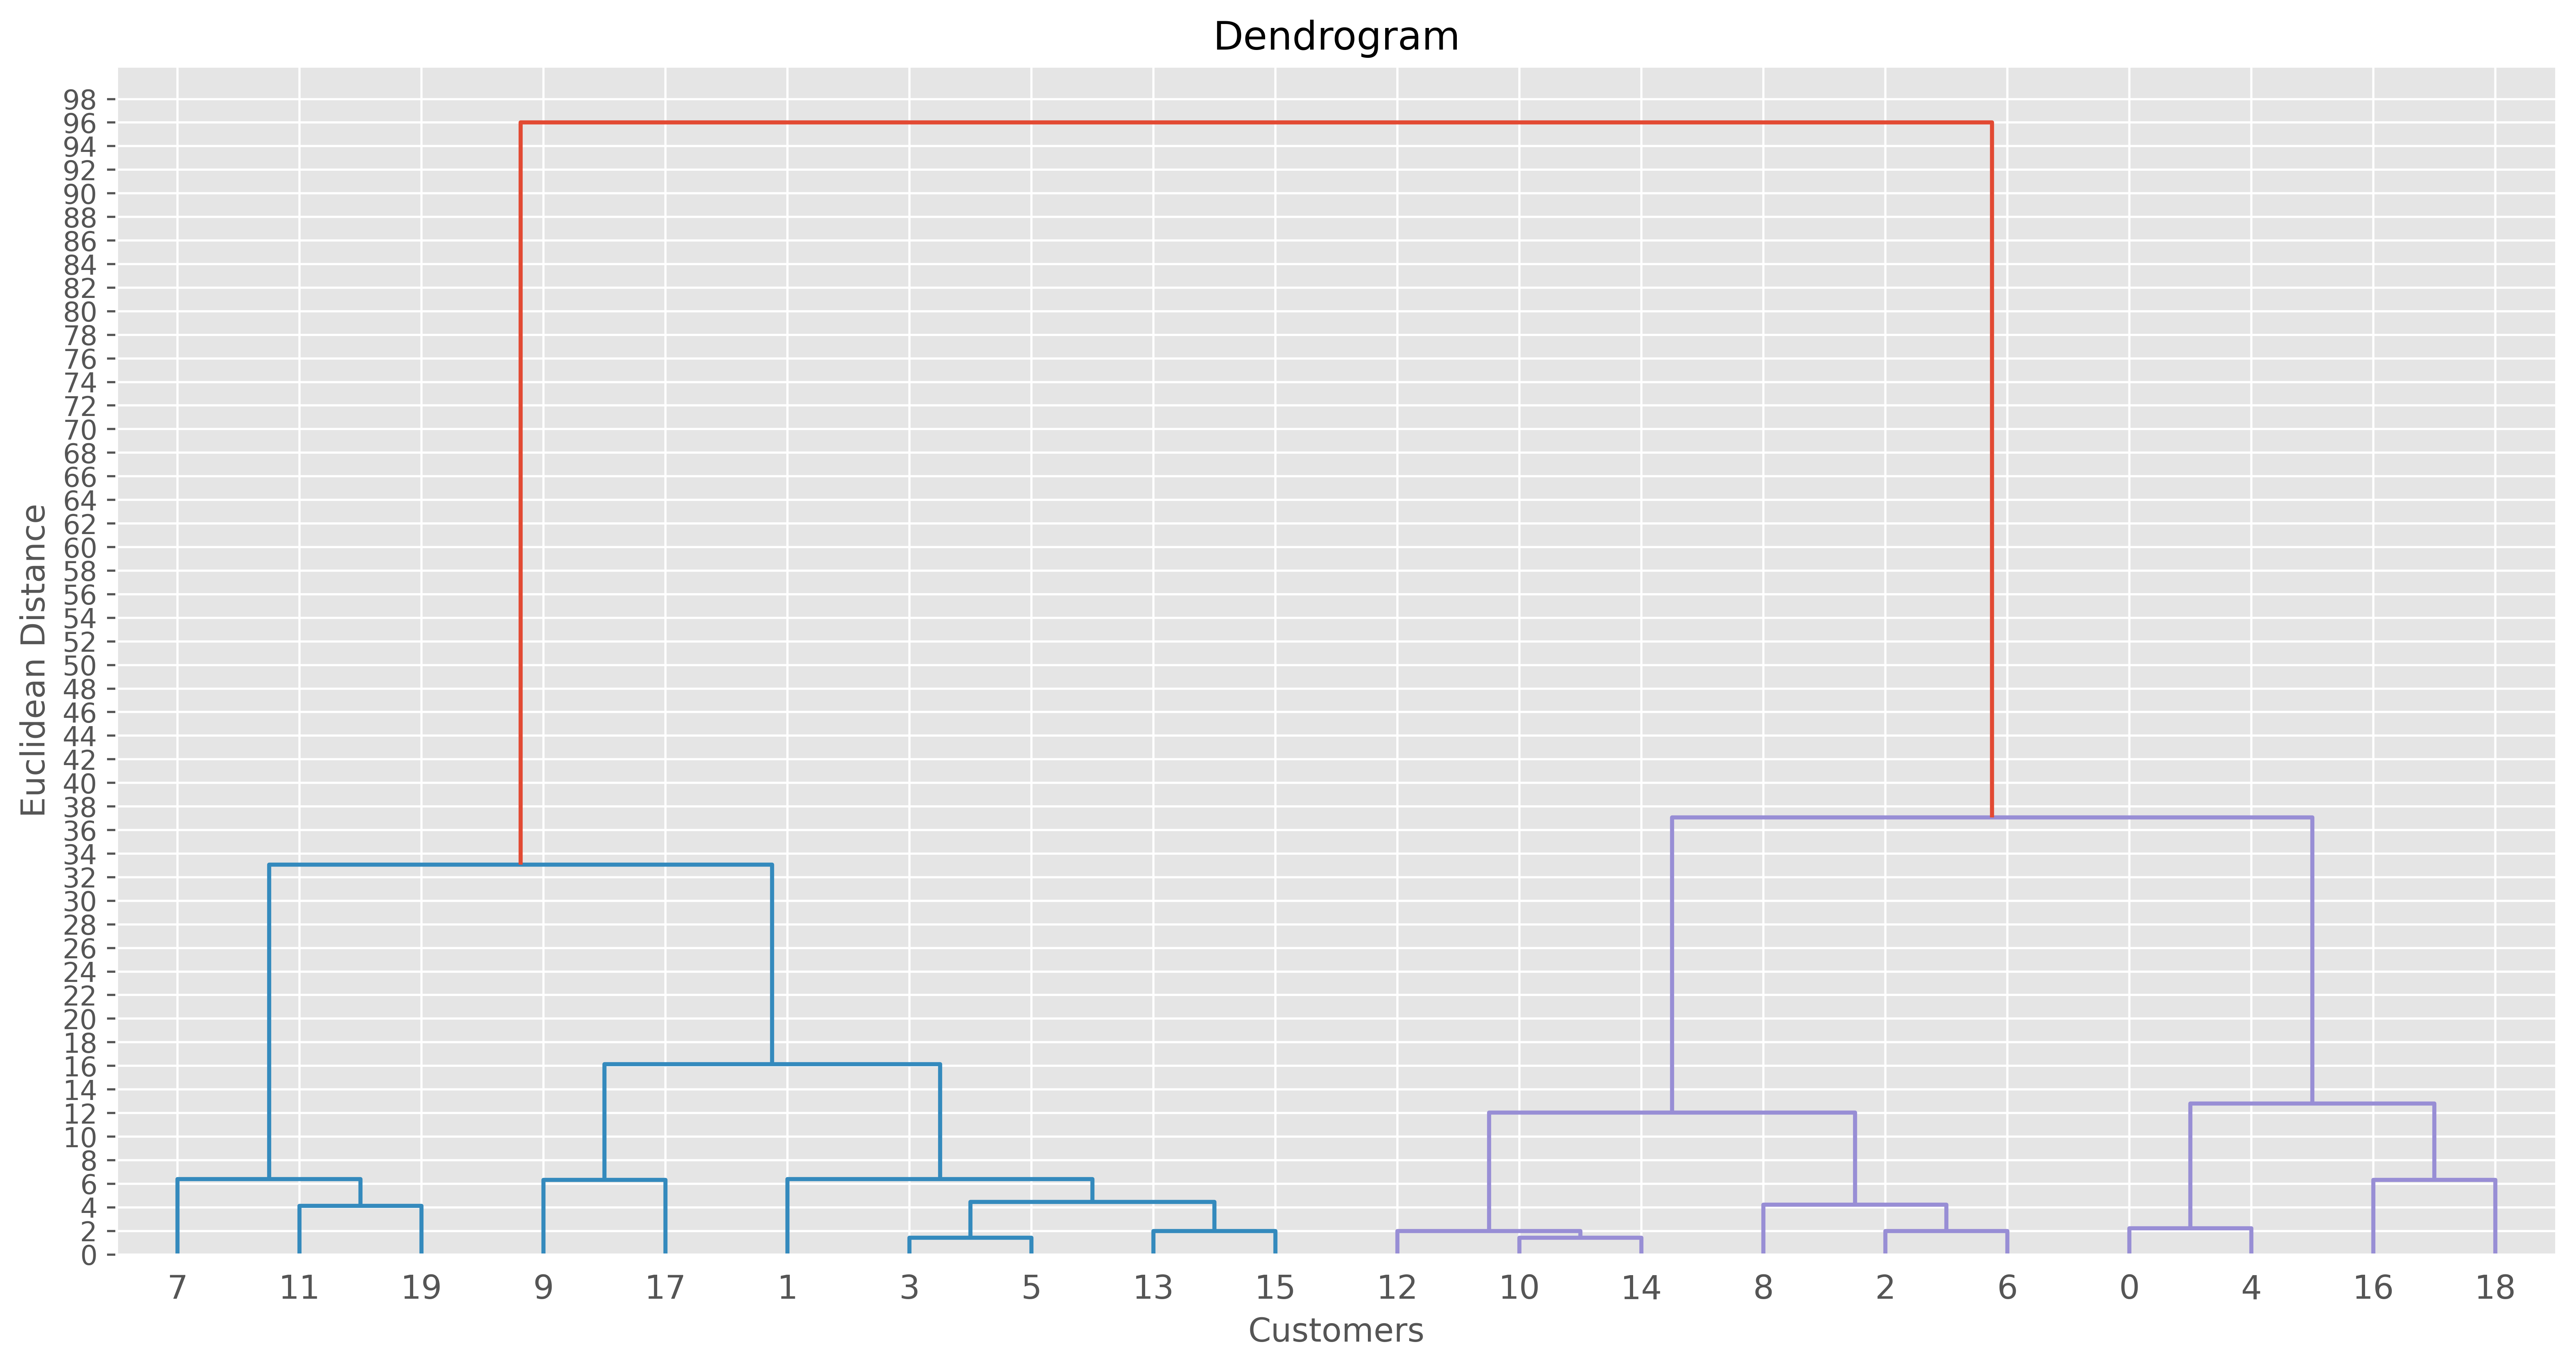

In [20]:
linkage_matrix = sch.linkage(X[:20], method = 'complete')

plt.figure(figsize = (16,8), dpi = 500)
dendrogm = sch.dendrogram(linkage_matrix)

plt.yticks(range(0,100,2))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

In [13]:
# Euclidean distance between 3rd and 5th data points
((16 - 17)**2 + (77-76)**2)**0.5

1.4142135623730951

In [19]:
# Euclidean Distance between 13th and 15th data points
((20-20)**2 + (77-79)**2)**0.5

2.0

In [22]:
print(X[0], X[4])
print(X[16], X[18])

[15 39] [17 40]
[21 35] [23 29]


In [23]:
# Complete linkage(farthest points)
((15-23)**2 + (39-29)**2)**0.5

12.806248474865697

## Simple Linkage

Text(0, 0.5, 'Euclidean Distance')

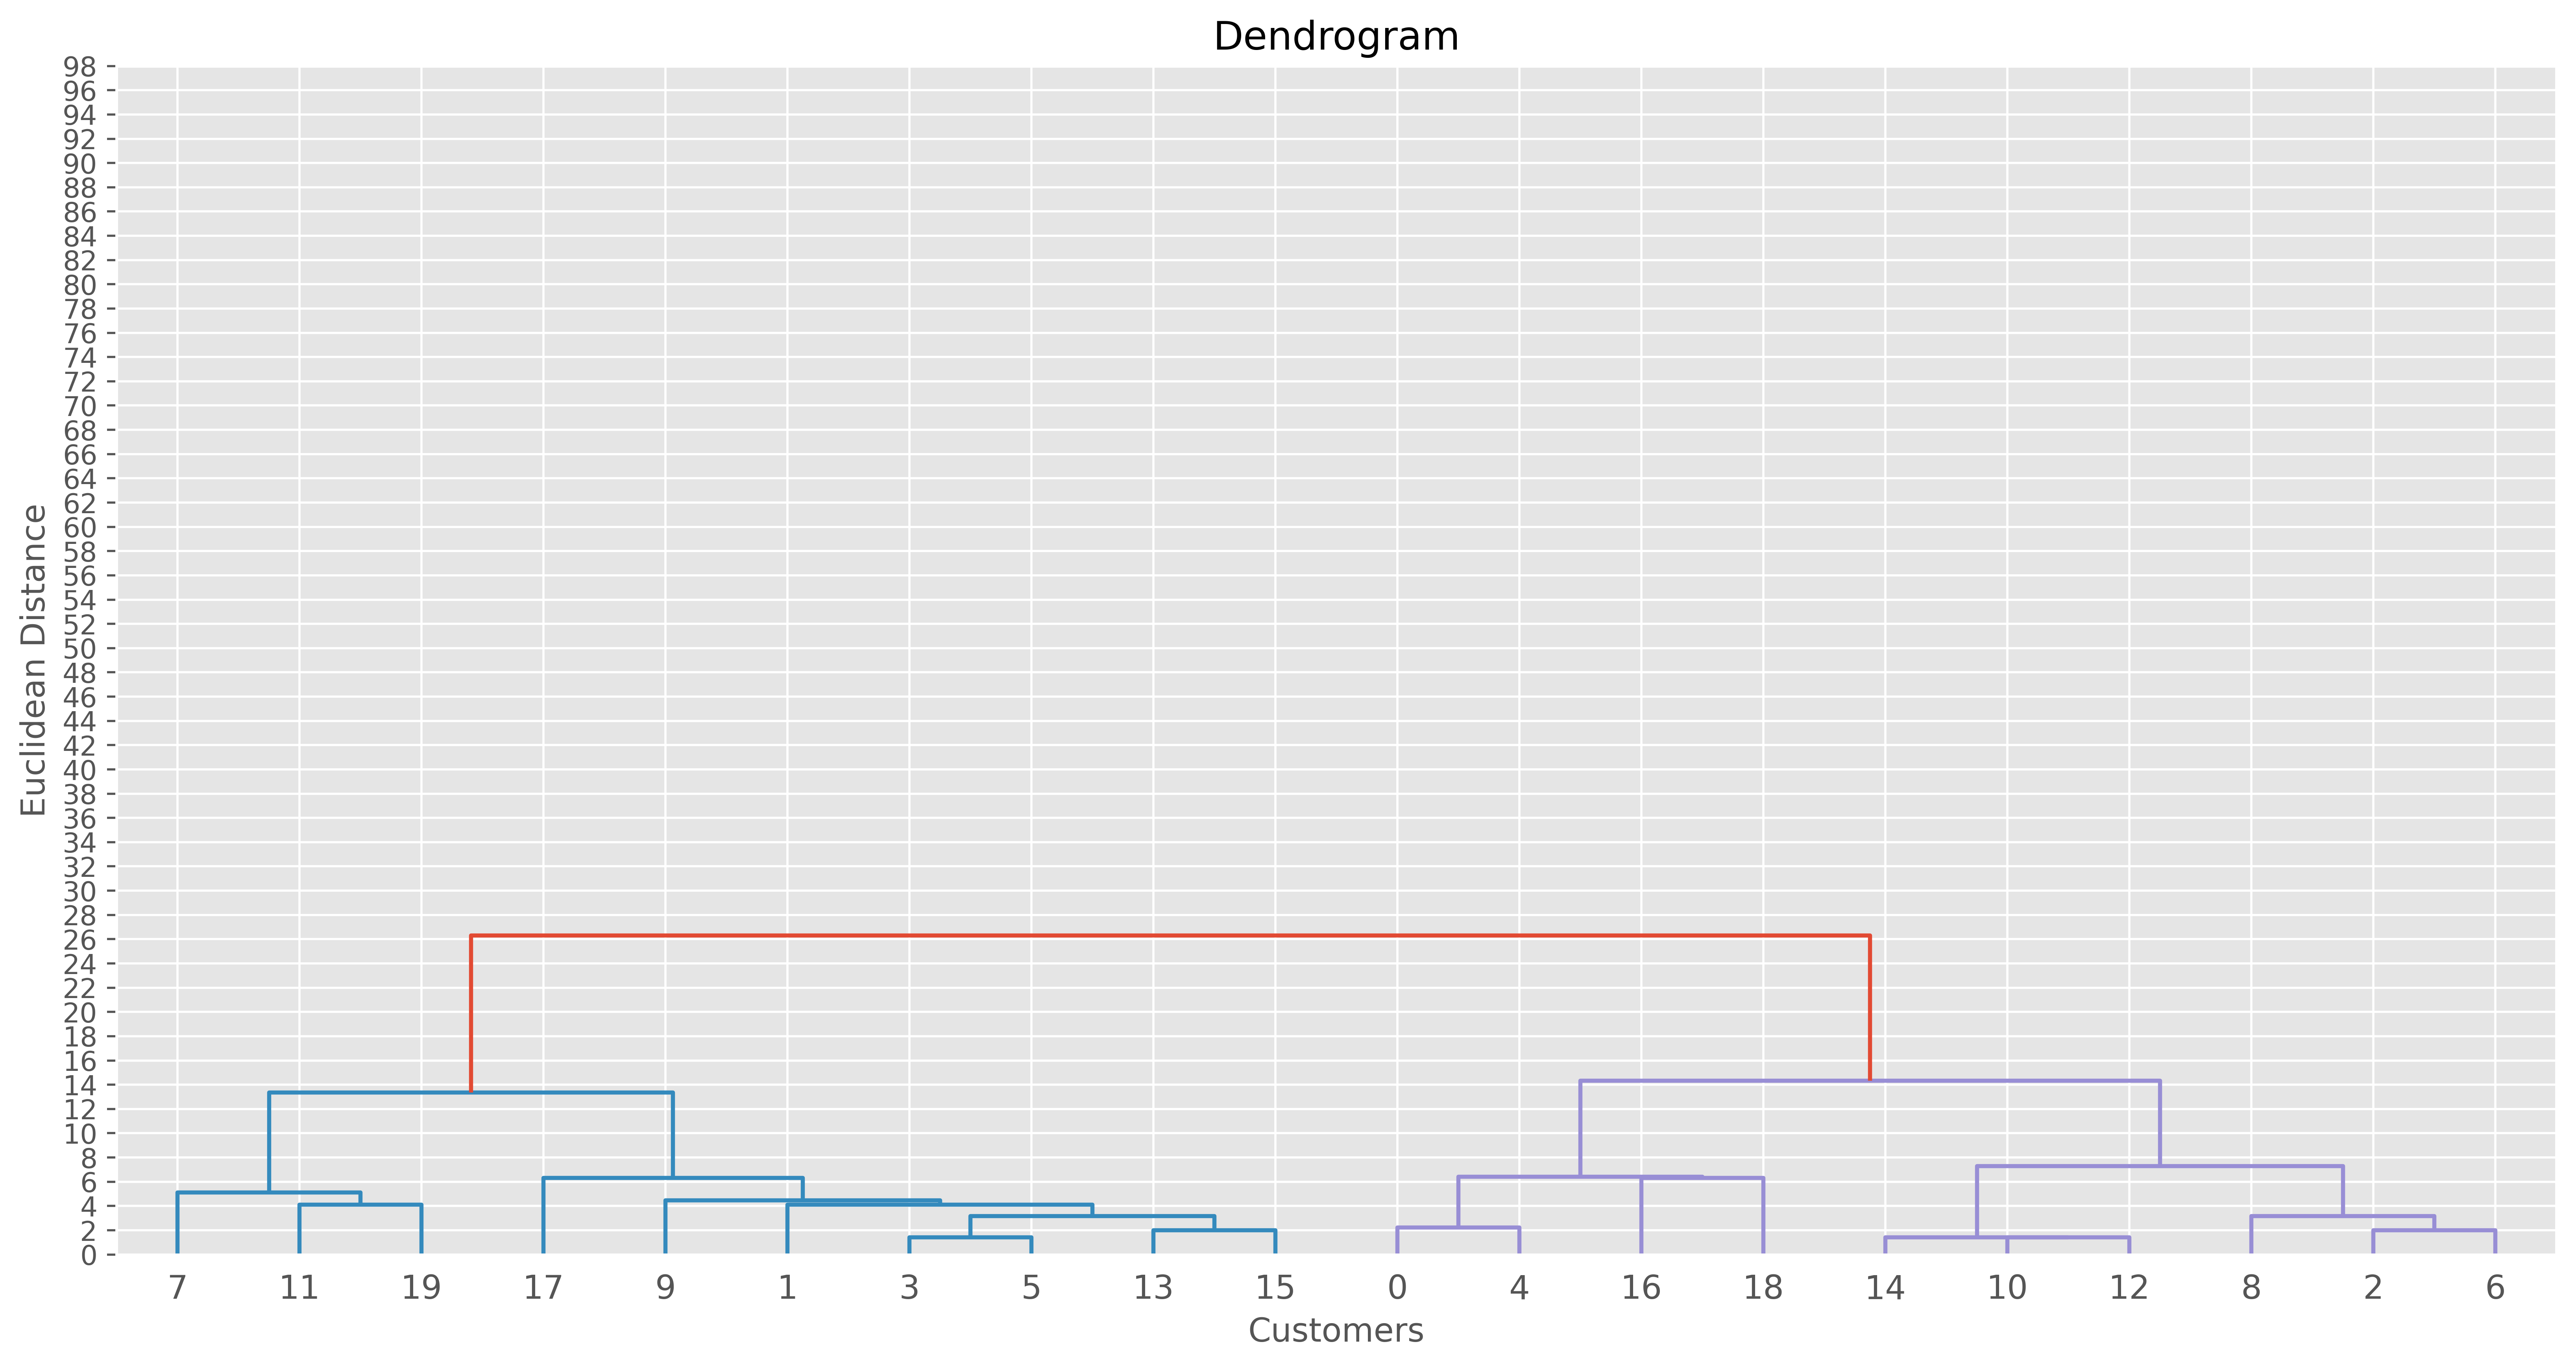

In [25]:
linkage_matrix = sch.linkage(X[:20], method = 'single')

plt.figure(figsize = (16,8), dpi = 500)
dendrogm = sch.dendrogram(linkage_matrix)

plt.yticks(range(0,100,2))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

In [26]:
print(X[3],X[5])
print(X[13],X[15])

[16 77] [17 76]
[20 77] [20 79]


In [27]:
((17-20)**2 + (76-77)**2)**0.5

3.1622776601683795

# ----------------------------------------------------------------------------------------------------------

In [29]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

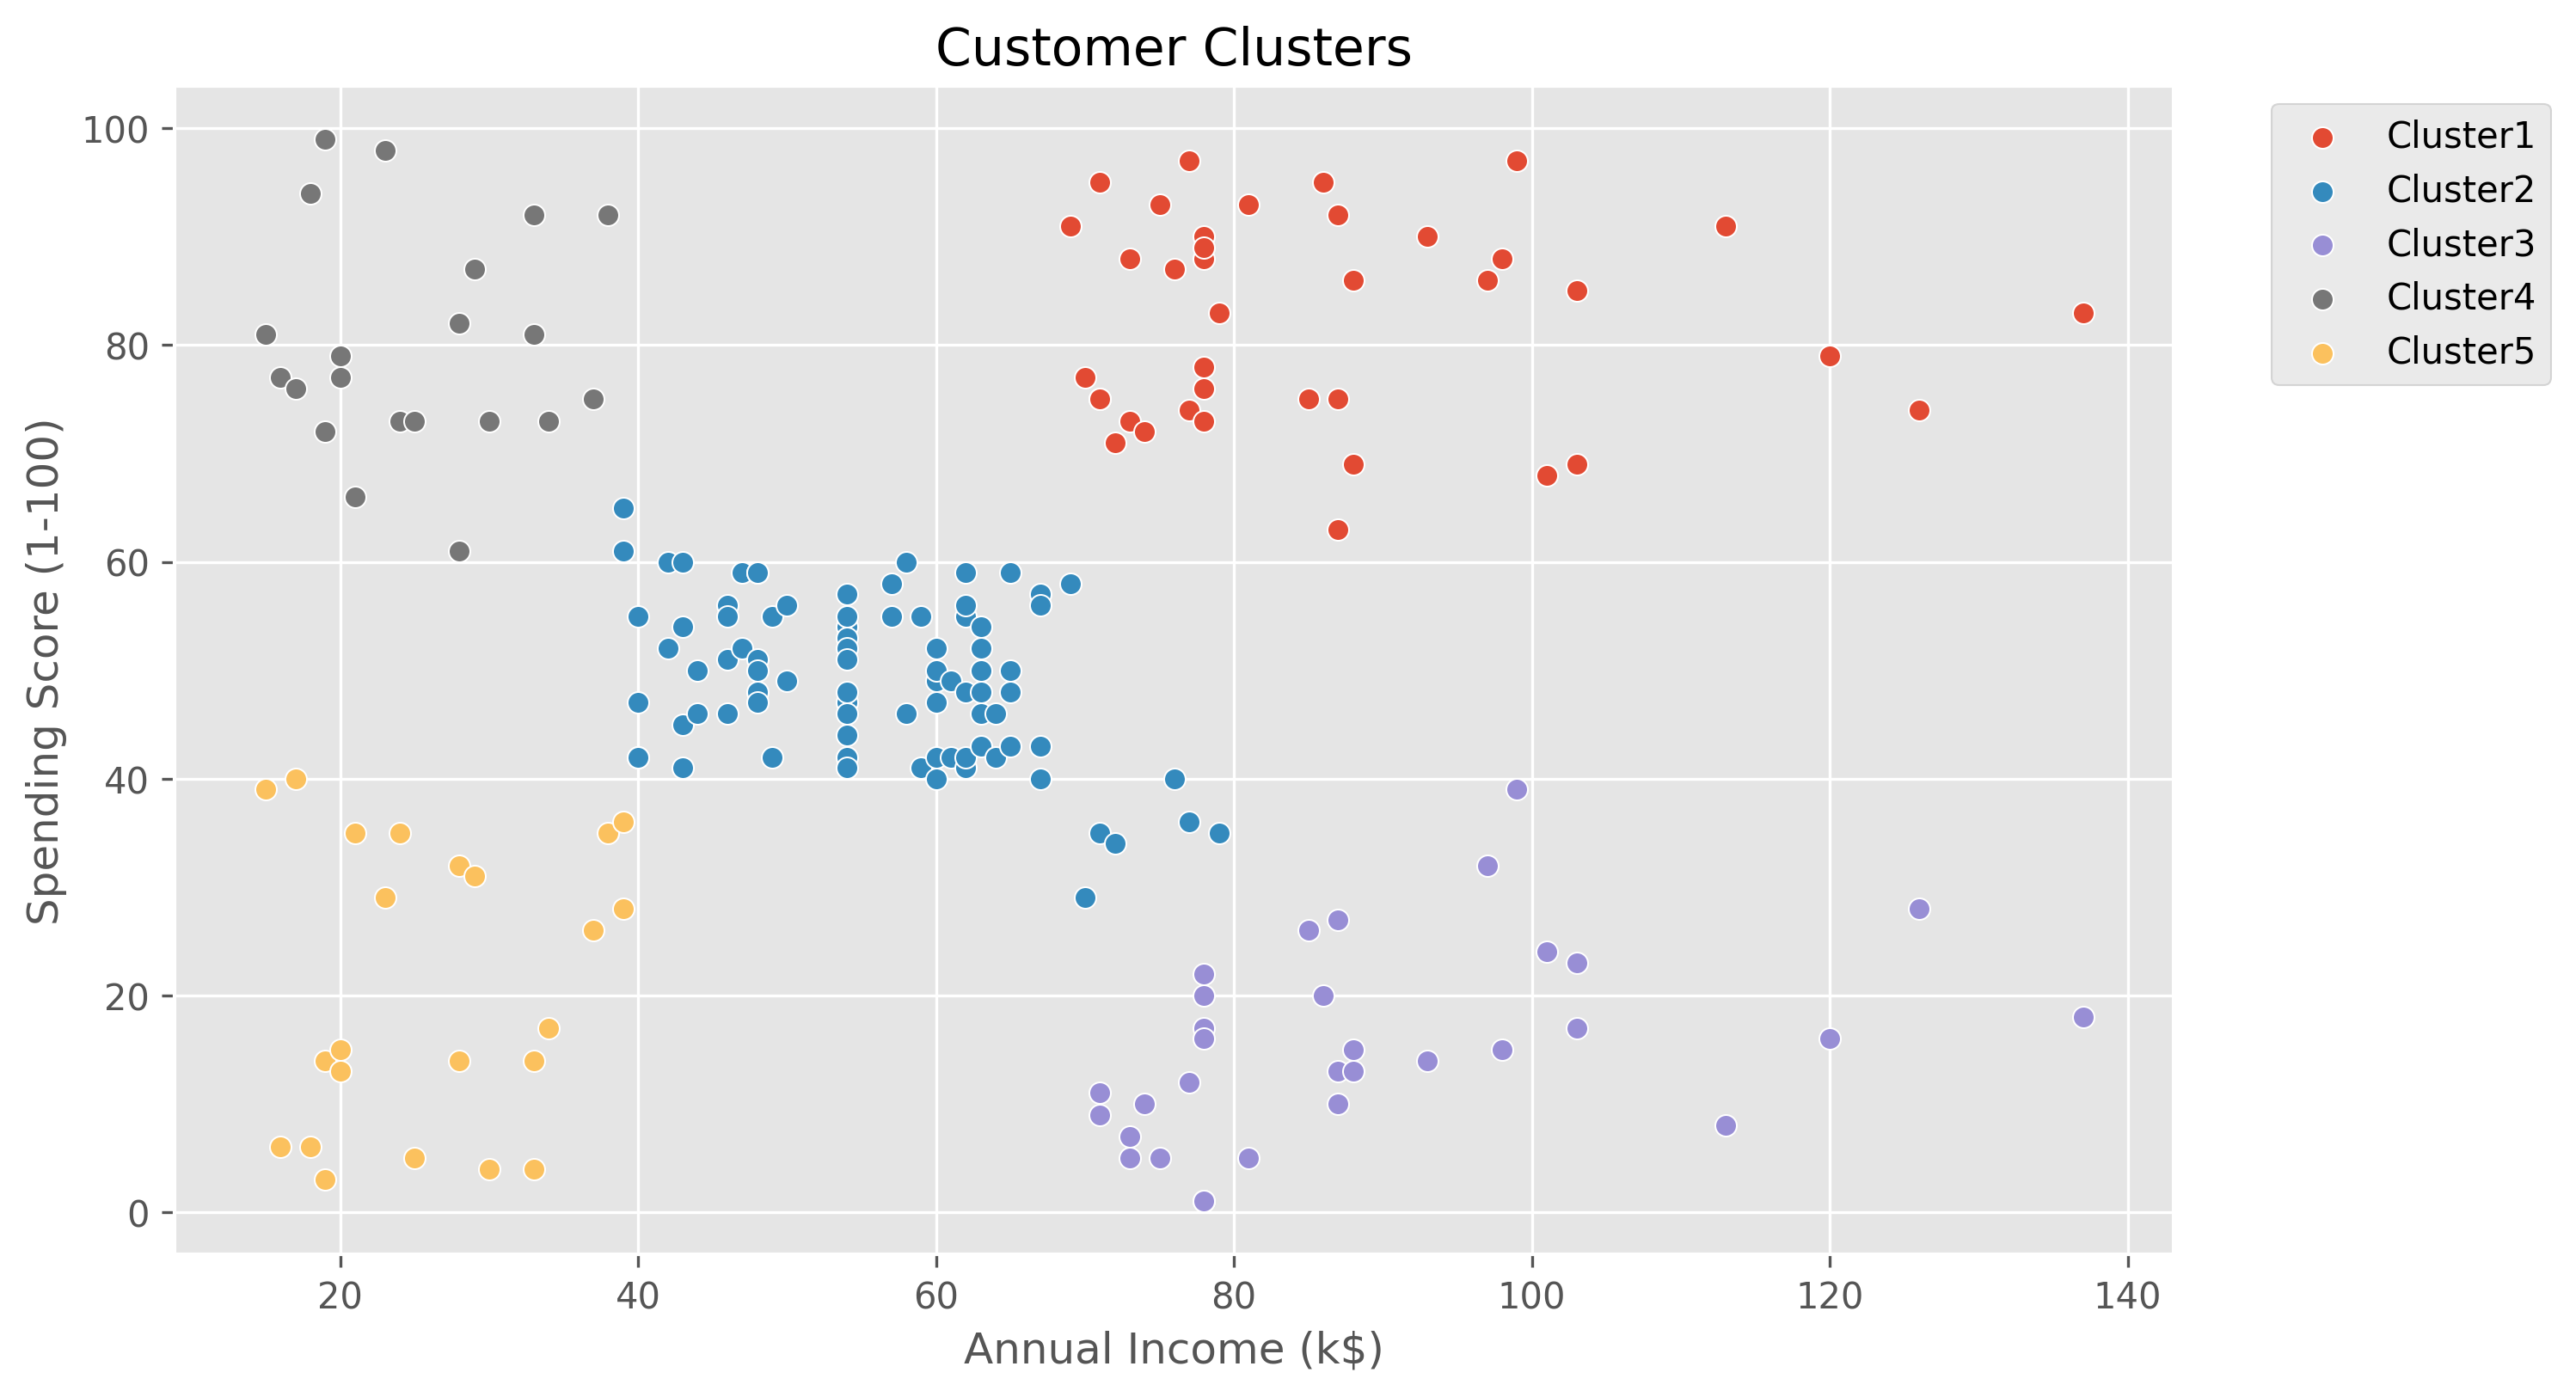

In [33]:
plt.figure(figsize = (10,6), dpi = 300)
sns.scatterplot(X[y_hc == 0,0], X[y_hc == 0,1], label = 'Cluster1')
sns.scatterplot(X[y_hc == 1,0], X[y_hc == 1,1], label = 'Cluster2')
sns.scatterplot(X[y_hc == 2,0], X[y_hc == 2,1], label = 'Cluster3')
sns.scatterplot(X[y_hc == 3,0], X[y_hc == 3,1], label = 'Cluster4')
sns.scatterplot(X[y_hc == 4,0], X[y_hc == 4,1], label = 'Cluster5')

plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")